# 1. Univariate Investment Risk and Returns

In [5]:
import matplotlib.pyplot as plt

In [1]:
fpath_csv='https://s3.amazonaws.com/assets.datacamp.com/production/course_6836/datasets/MSFTPrices.csv'

In [2]:
# Import pandas as pd
import pandas as pd

# Read in the csv file and parse dates
StockPrices = pd.read_csv(fpath_csv, parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


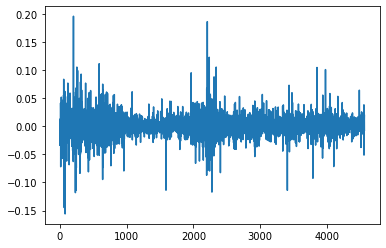

In [6]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

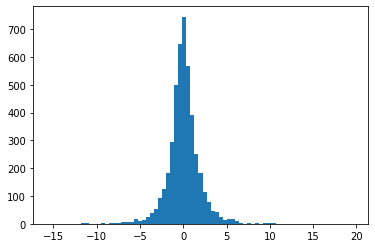

In [7]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

In [8]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.00037777546435757725
0.09985839482858783


In [9]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708328
0.0003740781650197374


In [10]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


In [11]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067852


In [12]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

10.31457261802553
13.31457261802553


In [13]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0


# 2. Portfolio Investing

In [22]:
url="https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv"
StockReturns = pd.read_csv(url,parse_dates=['Date'],index_col="Date")
StockReturns = StockReturns.sort_values("Date")
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


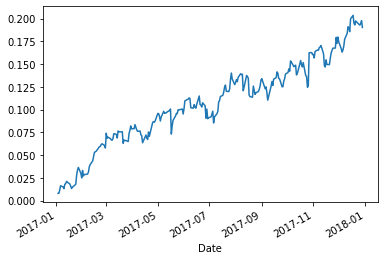

In [23]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [25]:
def cumulative_returns_plot(cols):
  CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1)
  CumulativeReturns.plot()
  plt.show()

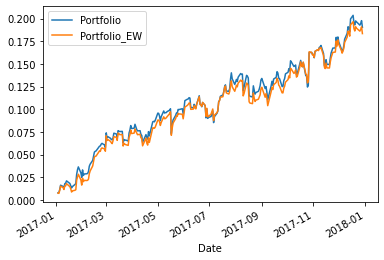

In [26]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

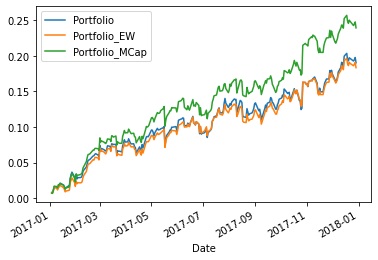

In [27]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

In [28]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.corr()

# Print the correlation matrix
print(correlation_matrix)

                    AAPL      MSFT  ...  Portfolio_EW  Portfolio_MCap
AAPL            1.000000  0.437430  ...      0.641583        0.752686
MSFT            0.437430  1.000000  ...      0.663890        0.723712
XOM             0.055505  0.084108  ...      0.350082        0.299451
JNJ             0.038432  0.230215  ...      0.309194        0.273830
JPM             0.199914  0.191248  ...      0.504123        0.441217
AMZN            0.509472  0.621096  ...      0.649387        0.709364
GE              0.006766 -0.044827  ...      0.383768        0.266083
FB              0.542367  0.543341  ...      0.652307        0.700801
T               0.005082 -0.021079  ...      0.385211        0.264897
Portfolio       0.653436  0.679864  ...      0.991379        0.976592
Portfolio_EW    0.641583  0.663890  ...      1.000000        0.980913
Portfolio_MCap  0.752686  0.723712  ...      0.980913        1.000000

[12 rows x 12 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


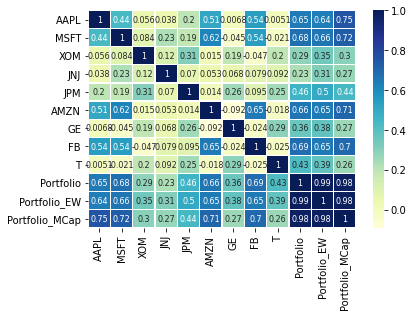

In [29]:
# Import seaborn as sns
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [42]:
# Calculate the covariance matrix
cov_mat = StockReturns.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

                    AAPL      MSFT  ...  Portfolio_EW  Portfolio_MCap
AAPL            0.030996  0.011400  ...      0.009491        0.011914
MSFT            0.011400  0.021912  ...      0.008257        0.009631
XOM             0.001093  0.001392  ...      0.003289        0.003010
JNJ             0.000774  0.003899  ...      0.002973        0.002817
JPM             0.005716  0.004597  ...      0.006878        0.006442
AMZN            0.018805  0.019275  ...      0.011439        0.013370
GE              0.000236 -0.001315  ...      0.006390        0.004740
FB              0.016243  0.013682  ...      0.009323        0.010718
T               0.000152 -0.000530  ...      0.005496        0.004044
Portfolio       0.010275  0.008988  ...      0.007440        0.007842
Portfolio_EW    0.009491  0.008257  ...      0.007059        0.007410
Portfolio_MCap  0.011914  0.009631  ...      0.007410        0.008083

[12 rows x 12 columns]


In [34]:
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.1 , 0.11, 0.14, 0.16])
portfolio_weights

array([0.12, 0.15, 0.08, 0.05, 0.09, 0.1 , 0.11, 0.14, 0.16])

In [43]:
cov_mat_annual = cov_mat_annual.iloc[:9,:9]
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


In [44]:
# Import numpy as np
import numpy as np

# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713807


In [46]:
RandomPortfolios = pd.read_csv("https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv")

In [47]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


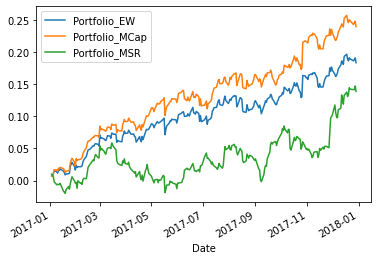

In [48]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

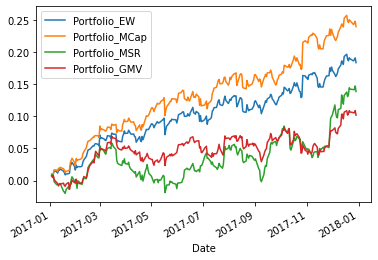

In [49]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0,0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

# 3. Factor Investing

In [51]:
url = "https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv"
FamaFrenchData = pd.read_csv(url,parse_dates=["Date"],index_col="Date")
FamaFrenchData.head()

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


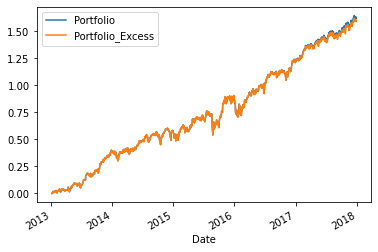

In [52]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [53]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

5.7261263381549724e-05
5.8803350882118946e-05
0.9737755165745471


In [54]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017834
0.9737755165745479


In [55]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585149


In [56]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319268  and is  significant


In [57]:
# Extract your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

0.00018326665203183487
0.04726181730280854


In [58]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.836724501922579


# 4. Value at Risk

In [59]:
cum_rets = pd.read_csv("https://assets.datacamp.com/production/repositories/1546/datasets/dfe9da08c986709d59943d1d5c0106537a8c608a/USO.csv",parse_dates=["Date"],index_col="Date")


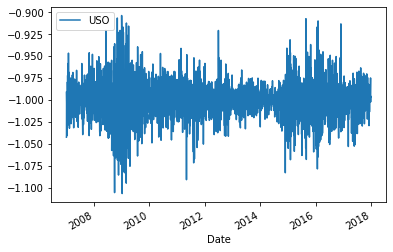

In [60]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

In [103]:
StockReturns_perc = cum_rets.mul(100)["USO"]
StockReturns_perc

Date
2007-01-03   -4.263558
2007-01-04   -4.068832
2007-01-05    0.928472
2007-01-08   -0.710851
2007-01-09   -0.400091
                ...   
2017-12-22    0.171821
2017-12-26    2.487136
2017-12-27   -0.251046
2017-12-28    0.419463
2017-12-29    0.334169
Name: USO, Length: 2769, dtype: float64

-3.6082337640374957


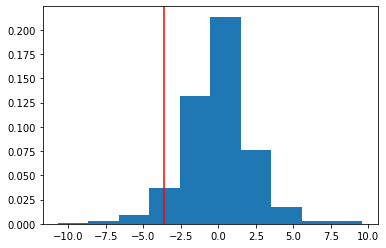

In [107]:
# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets,density=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label='VaR 95: {0:.2f}%'.format(var_95))
plt.show()

-5.054143158346779


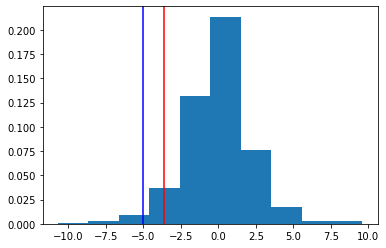

In [108]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets,density=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

In [119]:
def plot_hist(var,cvar):
  # Plot the probability of each return quantile
  plt.hist(sorted_rets,density=True)

  plt.axvline(x=var, color="r", linestyle="-", label='VaR : {0:.2f}%'.format(var))
  plt.axvline(x=cvar, color='b', linestyle='-', label='CVaR : {0:.2f}%'.format(cvar))
  plt.show()

In [110]:
# Historical VaR quantiles
var_90 = np.percentile(StockReturns_perc, 10)
print(var_90)

# Historical CVaR quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
print(cvar_90)

# Historical VaR quantiles
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)

# Historical CVaR quantiles
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)

# Historical VaR quantiles
var_99 = np.percentile(StockReturns_perc, 1)
print(var_99)

# Historical CVaR quantiles
cvar_99 = StockReturns_perc[StockReturns_perc <= var_99].mean()
print(cvar_99)

-2.558512646965176
-4.04318677051881
-3.6082337640374957
-5.054143158346779
-6.012059532883853
-7.422253935689953


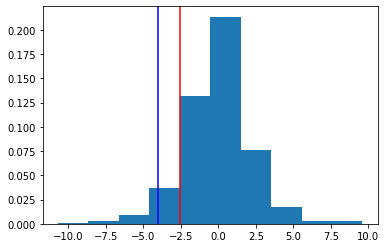

In [120]:
plot_hist(var_90,cvar_90)

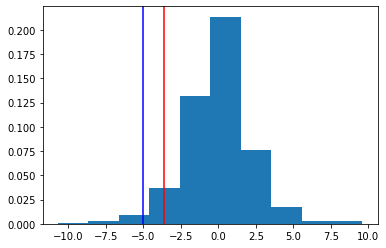

In [121]:
plot_hist(var_95,cvar_95)

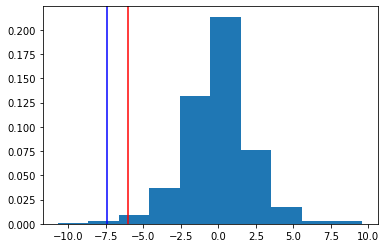

In [122]:
plot_hist(var_99,cvar_99)

In [136]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(cum_rets["USO"])

# Estimate the daily volatility
vol = np.std(cum_rets["USO"])

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  -0.00028638956240214754 
Volatility:  0.021888087129708873 
VaR(95):  -0.036289089064733646


In [138]:
var_95_perc = var_95*100

In [142]:
def plot_var_scale():
  # Plot the forecased vs time\n    
  plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
  plt.xlabel('Time Horizon T+i')   
  plt.ylabel('Forecasted VaR 95 (%)')
  plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
  plt.show()

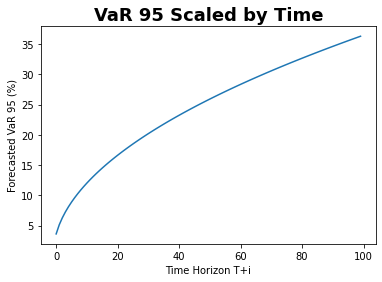

In [143]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(0, 100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95_perc*np.sqrt(i+1)
    
# Plot the results
plot_var_scale()

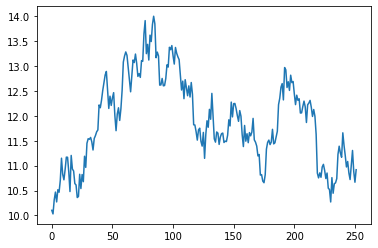

In [146]:
# Set the simulation parameters
mu = np.mean(cum_rets["USO"])
vol = np.std(cum_rets["USO"])
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = S0*rand_rets.cumprod()

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

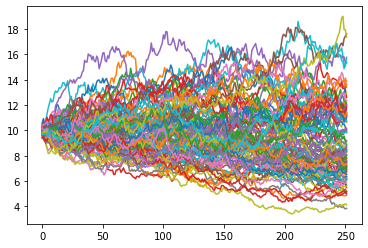

In [147]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [148]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.15 %
